# **[LAB1.2] 2ª Entrega do Lab1 - Visualização de Dados (TECC)**

## **ENUNCIADO**

Esta atividade prática em grupo consiste na implementação de um projeto de visualização de dados de forma programática, em laboratório de informática. 

Para o ferramental, vamos precisar apenas do Google Colab e das bibliotecas Python: Pandas e GeoPandas. Comece iniciando um novo Notebook Colab a partir do Google Drive de um membro do grupo. Uma vez criado/iniciado, é possível compartilhar o notebook com os demais membros do grupo. 

## Preparando Setup

Lendo dados e importando bibliotecas necessárias para a análise.

In [111]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [113]:
geo_data = gpd.read_file('/content/drive/MyDrive/vdd/uf.json')
parlamentares = pd.read_csv('/content/drive/MyDrive/vdd/cota-parlamentar.csv')

In [114]:
parlamentares.head()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.0,0.0,186.0,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.0,0.0,740.0,NaN


In [115]:
geo_data.head()

,id,name,uf,codigo,regiao,geometry
0,AC,Acre,Acre,12,Norte,"POLYGON ((-73.80058 -7.11131, -73.73736 -7.134..."
1,AL,Alagoas,Alagoas,27,Nordeste,"POLYGON ((-38.23778 -9.32808, -38.20166 -9.296..."
2,AM,Amazonas,Amazonas,13,Norte,"POLYGON ((-73.80058 -7.11131, -73.79607 -7.103..."
3,AP,Amapá,Amapá,16,Norte,"POLYGON ((-54.86988 2.43485, -54.79763 2.43875..."
4,BA,Bahia,Bahia,29,Nordeste,"POLYGON ((-45.72065 -10.15547, -45.71613 -10.1..."


## Tratamento dos dados relativos aos parlamentares

Alterações feitas no dataset:
  * Separando colunas uteis para a análise.
  * Filtrando dados pelo ano .
  * Dropando dados faltantes.


In [116]:
parlamentares_ = parlamentares[['vlrliquido', 'nudeputadoid', 'sguf', 'numano']]
parlamentares_ = parlamentares_[parlamentares_['numano']== 2019]
parlamentares_.dropna(inplace = True)
parlamentares_.head()

,vlrliquido,nudeputadoid,sguf,numano
11423,5990.37,1973,PE,2019
11424,22000.00,1973,PE,2019
11425,5500.00,1973,PE,2019
11426,0.61,1973,PE,2019
11427,305.59,1973,PE,2019


## Calculando gastos médios para cada UF

Ações feitas:
  * Contagem de parlamentares por UF.
  * Cálculo da soma total da coluna "vlrliquido" (Coluna que reporesenta ovalor liquido gasto).
  * Calculo do gasto médio por UF.

In [117]:
parl_p_uf = {}
for sguf in parlamentares_['sguf'].unique():
  sguf_df = parlamentares_[parlamentares_['sguf'] == sguf]
  parl_p_uf[sguf] = len(sguf_df['nudeputadoid'].unique())

parl_p_uf

{'AC': 14,
 'AL': 14,
 'AM': 14,
 'AP': 14,
 'BA': 55,
 'CE': 35,
 'DF': 14,
 'ES': 16,
 'GO': 27,
 'MA': 32,
 'MG': 81,
 'MS': 16,
 'MT': 15,
 'PA': 26,
 'PB': 18,
 'PE': 37,
 'PI': 15,
 'PR': 45,
 'RJ': 80,
 'RN': 12,
 'RO': 13,
 'RR': 12,
 'RS': 46,
 'SC': 27,
 'SE': 12,
 'SP': 102,
 'TO': 12}

In [118]:
def get_n_parlamentares(sguf):
  parl_p_uf = {'AC': 14,'AL': 14,'AM': 14,'AP': 14,'BA': 55,'CE': 35,'DF': 14,'ES': 16,
              'GO': 27,'MA': 32,'MG': 81,'MS': 16,'MT': 15,'PA': 26,'PB': 18,'PE': 37,
              'PI': 15,'PR': 45,'RJ': 80,'RN': 12,'RO': 13,'RR': 12,'RS': 46,'SC': 27,
              'SE': 12,'SP': 102,'TO': 12}
  return parl_p_uf[sguf]

In [119]:
parlamentares_media = parlamentares_.groupby('sguf').sum()
parlamentares_media['id'] = parlamentares_media.index
parlamentares_media['nparlamentares'] = parlamentares_media['id'].apply(get_n_parlamentares)
parlamentares_media['vlrliquido_medio'] = parlamentares_media['vlrliquido'] / parlamentares_media['nparlamentares']
parlamentares_media.head()

,vlrliquido,nudeputadoid,numano,id,nparlamentares,vlrliquido_medio
sguf,,,,,,
AC,4144572.95,9296888,6721251,AC,14,296040.925000
AL,3871093.26,10259221,6850467,AL,14,276506.661429
AM,3865131.56,8201828,5717808,AM,14,276080.825714
AP,4012855.00,8101287,5406882,AP,14,286632.500000
BA,17261252.76,54928292,45241752,BA,55,313840.959273


## Cruzando dados

In [120]:
final_set = pd.merge(parlamentares_media,geo_data, how='inner', on='id')
final_set.drop(['vlrliquido','nparlamentares','name','uf','codigo','regiao'],axis = 1,inplace = True)
final_set.head()

,nudeputadoid,numano,id,vlrliquido_medio,geometry
0,9296888,6721251,AC,296040.925000,"POLYGON ((-73.80058 -7.11131, -73.73736 -7.134..."
1,10259221,6850467,AL,276506.661429,"POLYGON ((-38.23778 -9.32808, -38.20166 -9.296..."
2,8201828,5717808,AM,276080.825714,"POLYGON ((-73.80058 -7.11131, -73.79607 -7.103..."
3,8101287,5406882,AP,286632.500000,"POLYGON ((-54.86988 2.43485, -54.79763 2.43875..."
4,54928292,45241752,BA,313840.959273,"POLYGON ((-45.72065 -10.15547, -45.71613 -10.1..."


In [121]:
geo_data['vlrliquido_medio'] = final_set['vlrliquido_medio']

## Plotando Gráfico

Text(0.5, 1.0, 'Média de gastos por parlamentar no ano de 2019, de acordo com seus estados de origem.')

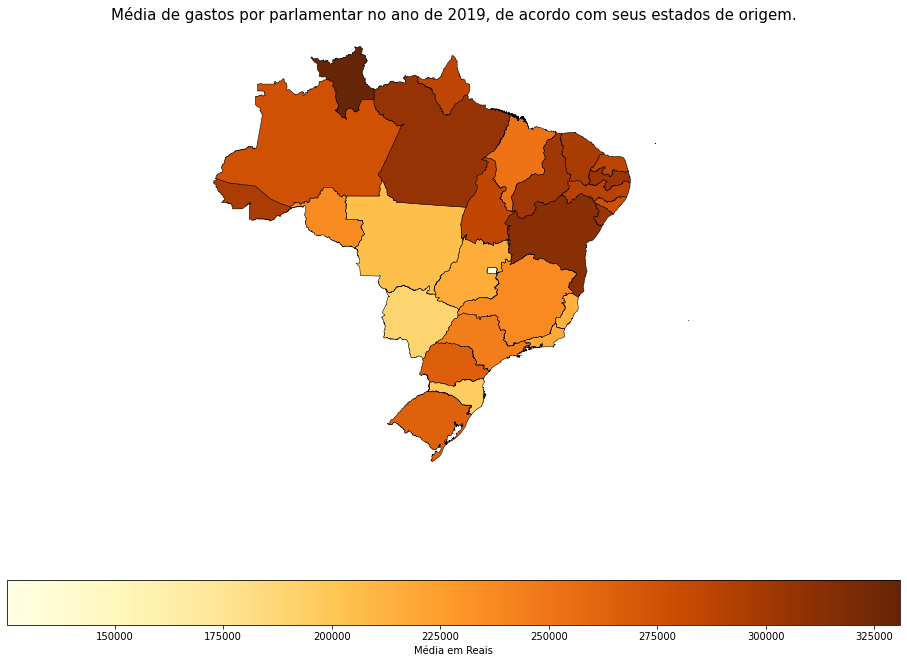

In [122]:
fig, ax = plt.subplots(1, figsize=(16,12))
ax.axis('off')
geo_data.plot(column='vlrliquido_medio', 
              cmap='YlOrBr', linewidth=.5, 
              ax=ax, edgecolor='k', legend = True, 
              legend_kwds={'label': "Média em Reais",'orientation': "horizontal"})
plt.title("Média de gastos por parlamentar no ano de 2019, de acordo com seus estados de origem.",fontsize = 15)